In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))


# 1. 데이터생성
- 남, 녀 키와 몸무게 데이터를 군집화

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [4]:
random.randint(140,195)

173

In [11]:
data=[]
# 남, 여 데이터 data에 추가
for i in range(50):
    data.append([random.randint(40,70), random.randint(140, 175)])
    
    data.append([random.randint(55,95), random.randint(160, 195)])
    
data

[[52, 174],
 [66, 163],
 [51, 175],
 [70, 172],
 [52, 157],
 [81, 185],
 [44, 165],
 [92, 181],
 [47, 164],
 [95, 174],
 [42, 159],
 [87, 178],
 [54, 173],
 [79, 189],
 [60, 174],
 [91, 183],
 [61, 167],
 [59, 182],
 [52, 166],
 [69, 175],
 [68, 171],
 [73, 163],
 [61, 151],
 [67, 187],
 [53, 144],
 [89, 160],
 [40, 155],
 [60, 181],
 [40, 175],
 [94, 170],
 [56, 155],
 [71, 184],
 [44, 142],
 [76, 166],
 [65, 157],
 [81, 168],
 [43, 173],
 [68, 172],
 [41, 143],
 [73, 183],
 [70, 173],
 [83, 183],
 [63, 160],
 [73, 162],
 [49, 148],
 [74, 194],
 [58, 163],
 [64, 161],
 [49, 171],
 [94, 170],
 [47, 151],
 [70, 169],
 [53, 146],
 [87, 189],
 [70, 161],
 [93, 195],
 [63, 151],
 [58, 178],
 [49, 145],
 [67, 179],
 [64, 151],
 [95, 165],
 [49, 159],
 [86, 186],
 [61, 162],
 [74, 193],
 [56, 149],
 [88, 169],
 [49, 165],
 [65, 184],
 [67, 157],
 [91, 163],
 [69, 154],
 [59, 183],
 [59, 163],
 [91, 184],
 [50, 171],
 [94, 175],
 [68, 175],
 [92, 195],
 [58, 169],
 [67, 177],
 [56, 157],
 [79

In [21]:
# 여자
# for female in data[::2]:
#     print(female, end)
    
print('여자: ',[female for female in data[::2]])
print('남자: ',[male for male in data[1::2]])
print("=======================================================================================================================================")

print('여자 몸무게: \n', [female[0] for female in data[::2]])
print('여자 키(y축): \n',[female[1] for female in data[::2]])

print('남자 몸무게: \n', [male[0] for male in data[1::2]])
print('남자 키(y축): \n',[male[1] for male in data[1::2]])

여자:  [[52, 174], [51, 175], [52, 157], [44, 165], [47, 164], [42, 159], [54, 173], [60, 174], [61, 167], [52, 166], [68, 171], [61, 151], [53, 144], [40, 155], [40, 175], [56, 155], [44, 142], [65, 157], [43, 173], [41, 143], [70, 173], [63, 160], [49, 148], [58, 163], [49, 171], [47, 151], [53, 146], [70, 161], [63, 151], [49, 145], [64, 151], [49, 159], [61, 162], [56, 149], [49, 165], [67, 157], [69, 154], [59, 163], [50, 171], [68, 175], [58, 169], [56, 157], [40, 147], [67, 152], [51, 142], [56, 142], [47, 147], [43, 175], [54, 141], [46, 174]]
남자:  [[66, 163], [70, 172], [81, 185], [92, 181], [95, 174], [87, 178], [79, 189], [91, 183], [59, 182], [69, 175], [73, 163], [67, 187], [89, 160], [60, 181], [94, 170], [71, 184], [76, 166], [81, 168], [68, 172], [73, 183], [83, 183], [73, 162], [74, 194], [64, 161], [94, 170], [70, 169], [87, 189], [93, 195], [58, 178], [67, 179], [95, 165], [86, 186], [74, 193], [88, 169], [65, 184], [91, 163], [59, 183], [91, 184], [94, 175], [92, 195]

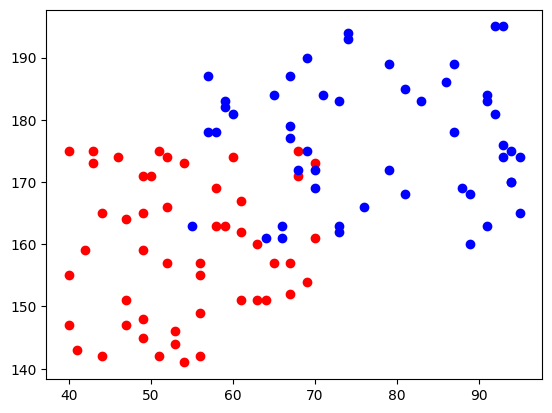

In [23]:
plt.plot( [female[0] for female in data[::2]],
        [female[1] for female in data[::2]], 'o',c='r')
plt.plot([male[0] for male in data[1::2]],
        [male[1] for male in data[1::2]], 'o',c='b')

# 2.군집화 로직

In [24]:
# 초기 랜덤 지점 2개
random_points= [ [random.randint(40,95), random.randint(140,195)], [random.randint(40,95), random.randint(140,195)]]
random_points

[[44, 174], [51, 191]]

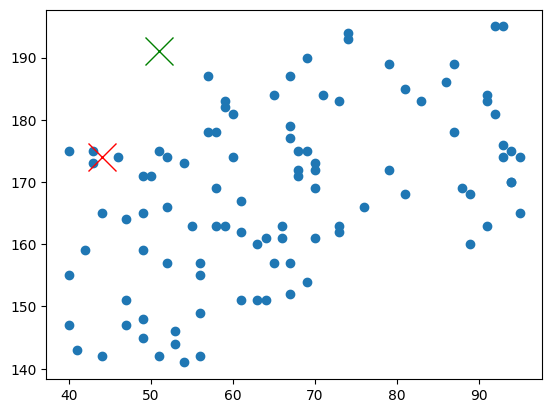

In [33]:
plt.plot([d[0] for d in data], [d[1] for d in data],'o' )
plt.plot(random_points[0][0], random_points[0][1], 'x', c='red', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', c='green', markersize=20)

In [35]:
# 두 점 거리를 return a: [0,0]
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
dist([0,0],[3,4])

5.0

In [36]:
# random_points[0]에 가까운 그룹과 random_points[1]에 가까운 그룹을 분류

group0= []
group1= []

for d in data:
    if dist(random_points[0], d) < dist(random_points[1],d):
        group0.append(d)
    else:
        group1.append(d)
        
len(group0), len(group1)


(64, 36)

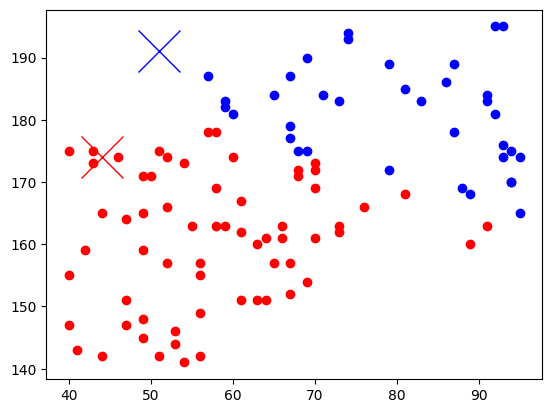

In [40]:
plt.plot([d[0] for d in group0],[d[1] for d in group0], 'o',c='r')
plt.plot(random_points[0][0], random_points[0][1], 'x', c='r', markersize=30)

plt.plot([d[0] for d in group1],[d[1] for d in group1], 'o',c='b')
plt.plot(random_points[1][0], random_points[1][1], 'x', c='b', markersize=30)

In [45]:
# 기준점 이동: group0의 중심점(기준점0), group1의 중심점(기준점1)
group0_meanX= np.mean([d[0] for d in group0])
group0_meanY= np.mean([d[1] for d in group0])
random_points[0]= [group0_meanX, group0_meanY]

group1_meanX= np.mean([d[0] for d in group1])
group1_meanY= np.mean([d[1] for d in group1])
random_points[1]= [group1_meanX, group1_meanY]

random_points

[[57.75, 160.703125], [79.86111111111111, 180.97222222222223]]

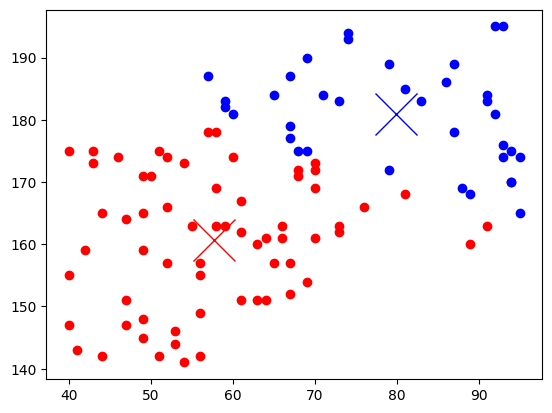

In [49]:
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', c='r')  # group0 점들
plt.plot(random_points[0][0], random_points[0][1], 'x', c='r', markersize=30)  # 중심점

plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', c='b')  # group1 점들
plt.plot(random_points[1][0], random_points[1][1], 'x', c='b', markersize=30)  # 중심점


# 3. 군집화 전체 코드(for문 이용)
- 랜덤포인트 2개 지정
- for문
    * random_points 2지점 기준으로 group0과 group1나눔
    * group0의 중간점과 group1의 중간점을 랜덤포인트로 업데이트
    * 랜덤 포인트 출력과 시각화

초기 기준점:  [[61, 179], [74, 188]]
1 번째 points:  [[57.22857142857143, 163.1], [85.5, 179.43333333333334]]
2 번째 points:  [[56.6865671641791, 162.50746268656715], [84.03030303030303, 179.15151515151516]]
3 번째 points:  [[55.70967741935484, 161.5483870967742], [82.02631578947368, 178.52631578947367]]
4 번째 points:  [[55.266666666666666, 161.25], [81.375, 178.125]]
5 번째 points:  [[54.741379310344826, 161.05172413793105], [80.85714285714286, 177.5952380952381]]
6 번째 points:  [[54.375, 160.57142857142858], [80.13636363636364, 177.45454545454547]]
7 번째 points:  [[54.094339622641506, 159.35849056603774], [78.80851063829788, 177.74468085106383]]
8 번째 points:  [[54.094339622641506, 159.35849056603774], [78.80851063829788, 177.74468085106383]]
9 번째 points:  [[54.094339622641506, 159.35849056603774], [78.80851063829788, 177.74468085106383]]


(140.0, 195.0)

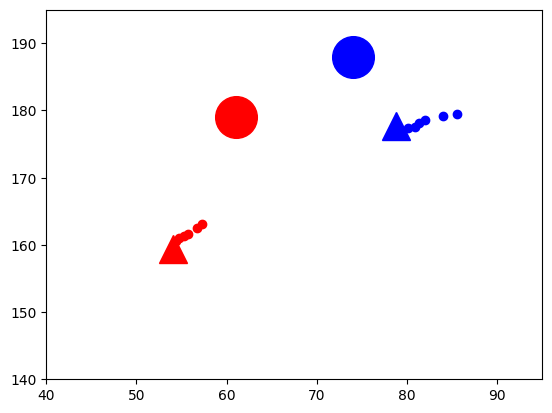

In [63]:
points= [
    [random.randint(40, 95), random.randint(140,195)],
    [random.randint(40, 95), random.randint(140,195)],
]

print('초기 기준점: ', points)

plt.plot(points[0][0],points[0][1], 'o', c='r', markersize=30)
plt.plot(points[1][0],points[1][1], 'o', c='b', markersize=30)

for i in range(1,10):
    group0= []
    group1= []
    for d in data:
        if dist(d, points[0])< dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
    
    # 포인트 출력
    
    # group0의 중간점, group1의 중간점으로 points 업데이트
    group0_mean_X= np.mean([d[0] for d in group0])
    group0_mean_Y= np.mean([d[1] for d in group0])
    points[0]= [group0_mean_X, group0_mean_Y]
    group1_mean_X= np.mean([d[0] for d in group1])
    group1_mean_Y= np.mean([d[1] for d in group1])
    points[1]= [group1_mean_X, group1_mean_Y]
    
    print(i, '번째 points: ', points)
    plt.plot(points[0][0],points[0][1], 'o', c='r')
    plt.plot(points[1][0],points[1][1], 'o', c='b') 
    
    
    

plt.plot(points[0][0],points[0][1], '^', c='r', markersize=20)
plt.plot(points[1][0],points[1][1], '^', c='b', markersize=20) 
plt.xlim([40,95])
plt.ylim([140,195])
    

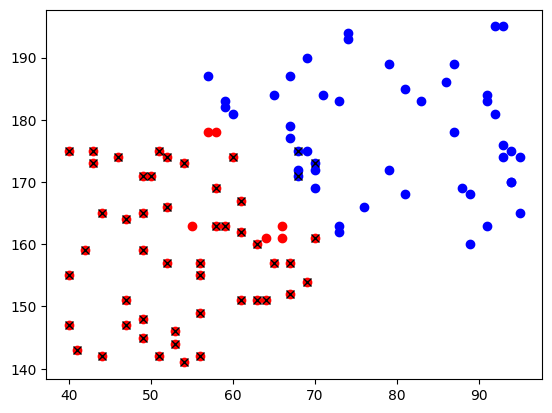

In [68]:
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o' , c= 'r')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', c= 'b')
plt.plot([d[0] for d in data[::2]], [d[1] for d in data[::2]], 'x' , c= 'k')


# 4. api(sklearn)
- sklearn: 머신러닝 패키지
    * 예측모델: 분류, 회귀, 군집분석  - fit(학습), predict(예측)
    * 변환모델: 전처리시 사용 ex. 인코딩, 스케일조정 - fit(학습), transform(변환함수), fit_transform(학 -> 변)

In [2]:
# 군집분석 라이브러리가 경고 메세지(joblib 충돌) 출력할 경우
import os
os.environ['OMP_NUM_THREADS']= '1'

In [1]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters=2,
             init='random',
             n_init=10,      # 실행 횟수
             random_state=7) # random 결과를 일관적으로 맞추기 위한 seed
model.fit(data)

NameError: name 'data' is not defined

In [70]:
# 기준점(중심점)
model.cluster_centers_

array([[ 78.80851064, 177.74468085],
       [ 54.09433962, 159.35849057]])

In [71]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [73]:
group0 =data[model.labels_==0]
group1 = data[model.labels_==1]

TypeError: only integer scalar arrays can be converted to a scalar index